In [1]:
import scipy.special

In [2]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

# neural network class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to j in the next layer
        # w11 w12
        # w21 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        # learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x:scipy.special.expit(x)

        pass

    # train the nneural network
    def train():
        pass

    # train the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin = 2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs



In [3]:
# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate is 0.5
learning_rate = 0.5

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [4]:
n.query([1.0, 0.5, -1.5])

array([[0.45624263],
       [0.47304136],
       [0.60612489]])

In [5]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [6]:
date_file = open("D:\\学习\\科研\\2019年 生态中心\\Python\\神经网络书籍\\Python神经网络编程资源makeyourownneuralnetwork-master\\makeyourownneuralnetwork-master\\mnist_dataset\\mnist_train_100.csv", 'r')
date_list = date_file.readlines()
date_file.close()

In [7]:
len(date_list)

100

In [8]:
date_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [9]:
# 将使用逗号分隔的数字列表转换成合适的数组。包括以下步骤
# 将由逗号分隔，长的文本字符串，拆分成单个值，在逗号处进行分隔
# 忽略第一个值，这是标签，将剩余的28*28=784个值转换成28列28行的数组
# 绘制数组

import numpy
import matplotlib.pyplot
%matplotlib inline

# 接受打印出来的date_list[0]，根据逗号将这一长串进行拆分，split()函数执行，其中一个参数告诉函数根据哪个符号进行拆分
# 逗号作为分隔符，将得到的结果放到all_values中
# numpy.asfarray()是一个numpy函数，将文本字符串转换为实数，并创建这些数字的数组
# 文件是以文本的形式读取的，每一行或每一条记录依然是文本。由逗号分隔每一行得到的仍然是文本片段
# .reshape(28,28)确保数字列表每28个元素折返一次，形成28*28的数组名为image_array
# 使用imshow()函数绘制出image_array，选择灰度调色板cmap='Greys'，以更好地显示手写字符
all_values = date_list[0].split(',')
image_array = numpy.asfarray(all_values[1:].reshape(28,28))
matplotlib.pyplot.inshow(image_array, cmap='Greys', interpolation='None')

AttributeError: 'list' object has no attribute 'reshape'

In [10]:
# 将使用逗号分隔的数字列表转换成合适的数组。包括以下步骤
# 将由逗号分隔，长的文本字符串，拆分成单个值，在逗号处进行分隔
# 忽略第一个值，这是标签，将剩余的28*28=784个值转换成28列28行的数组
# 绘制数组

import numpy
import matplotlib.pyplot
%matplotlib inline

# 接受打印出来的date_list[0]，根据逗号将这一长串进行拆分，split()函数执行，其中一个参数告诉函数根据哪个符号进行拆分
# 逗号作为分隔符，将得到的结果放到all_values中
# numpy.asfarray()是一个numpy函数，将文本字符串转换为实数，并创建这些数字的数组
# 文件是以文本的形式读取的，每一行或每一条记录依然是文本。由逗号分隔每一行得到的仍然是文本片段
# .reshape(28,28)确保数字列表每28个元素折返一次，形成28*28的数组名为image_array
# 使用imshow()函数绘制出image_array，选择灰度调色板cmap='Greys'，以更好地显示手写字符
all_values = date_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.inshow(image_array, cmap='Greys', interpolation='None')

AttributeError: module 'matplotlib.pyplot' has no attribute 'inshow'

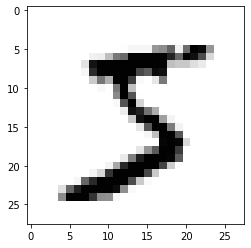

In [11]:
# 将使用逗号分隔的数字列表转换成合适的数组。包括以下步骤
# 将由逗号分隔，长的文本字符串，拆分成单个值，在逗号处进行分隔
# 忽略第一个值，这是标签，将剩余的28*28=784个值转换成28列28行的数组
# 绘制数组

import numpy
import matplotlib.pyplot
%matplotlib inline

# 接受打印出来的date_list[0]，根据逗号将这一长串进行拆分，split()函数执行，其中一个参数告诉函数根据哪个符号进行拆分
# 逗号作为分隔符，将得到的结果放到all_values中
# numpy.asfarray()是一个numpy函数，将文本字符串转换为实数，并创建这些数字的数组
# 文件是以文本的形式读取的，每一行或每一条记录依然是文本。由逗号分隔每一行得到的仍然是文本片段
# .reshape(28,28)确保数字列表每28个元素折返一次，形成28*28的数组名为image_array
# 使用imshow()函数绘制出image_array，选择灰度调色板cmap='Greys'，以更好地显示手写字符
all_values = date_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

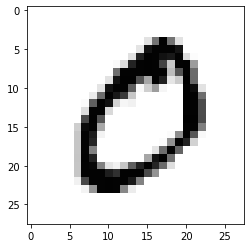

In [12]:
# 选择下一条记录date_list[1]，而记录的标签为0，得到下面图片
all_values = date_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')


In [13]:
# scale input to range 0.01 to 1.00
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [1]:
import os
import imageio
imageio.imread("D:\\学习\\科研\\2019年 生态中心\\Python\\神经网络书籍\\Python神经网络编程资源makeyourownneuralnetwork-master\\makeyourownneuralnetwork-master\\my_own_images\\2828_my_own_noisy_6.png")

Array([[[183, 183, 183, 226],
        [187, 187, 187, 242],
        [185, 185, 185, 240],
        ...,
        [183, 183, 183, 175],
        [185, 185, 185, 215],
        [180, 180, 180, 233]],

       [[179, 179, 179, 255],
        [186, 186, 186, 255],
        [191, 191, 191, 255],
        ...,
        [187, 187, 187, 255],
        [189, 189, 189, 255],
        [185, 185, 185, 255]],

       [[179, 179, 179, 240],
        [188, 188, 188, 255],
        [189, 189, 189, 255],
        ...,
        [184, 184, 184, 255],
        [188, 188, 188, 255],
        [187, 187, 187, 240]],

       ...,

       [[183, 183, 183, 240],
        [183, 183, 183, 255],
        [185, 185, 185, 255],
        ...,
        [183, 183, 183, 255],
        [189, 189, 189, 255],
        [179, 179, 179, 241]],

       [[184, 184, 184, 255],
        [183, 183, 183, 255],
        [184, 184, 184, 255],
        ...,
        [181, 181, 181, 255],
        [184, 184, 184, 255],
        [181, 181, 181, 255]],

       [[186